### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('../data/coupons.csv')

In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [8]:
print("Shape:", data.shape)

Shape: (12684, 26)


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [10]:
# ---------- Quick Audit ----------
print("\nMissingness (top 15):")
display(data.isna().mean().sort_values(ascending=False).head(15))


Missingness (top 15):


car                     0.991485
CoffeeHouse             0.017108
Restaurant20To50        0.014901
CarryAway               0.011905
RestaurantLessThan20    0.010249
Bar                     0.008436
destination             0.000000
passanger               0.000000
direction_opp           0.000000
direction_same          0.000000
toCoupon_GEQ25min       0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ5min        0.000000
income                  0.000000
occupation              0.000000
dtype: float64

In [12]:
# find the 'total' null value count

data.isnull().sum().sum()

np.int64(13370)

In [13]:
# find the null value counts for all the columns in a simple way

data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [14]:
# The below command calculates some statistical data like percentile, mean and std of the numerical values of the DataFrame

data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [16]:
## correct Nan values

In [17]:
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [18]:
df = data
df['car']=df['car'].fillna(value='no')

In [19]:
# Fill the remaining non null values in 'car'column as 'yes' & 'no' as appropriate

df = df.replace({'car' : {'Scooter and motorcycle' : 'yes', 'crossover' : 'yes', 'Mazda5' : 'yes',
                          'do not drive' : 'no', 'Car that is too old to install Onstar :D' : 'no'}})

In [20]:
df['car'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
## correct Null values

In [21]:
df.isnull().sum().sum()

np.int64(794)

In [22]:
df = df.dropna()
df.isnull().sum().sum()

np.int64(0)

4. What proportion of the total observations chose to accept the coupon?



In [24]:
coupon_accepted = df['Y'].value_counts()[1]

# calculating the total coupon offered count

total_coupon_offered = df['Y'].count()

#calculating the proportion of coupon acceptance from above values

proportion_of_coupon_acceptance = round((coupon_accepted/total_coupon_offered)*100,2)

print(proportion_of_coupon_acceptance)

56.93


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Coupon Type by Count')

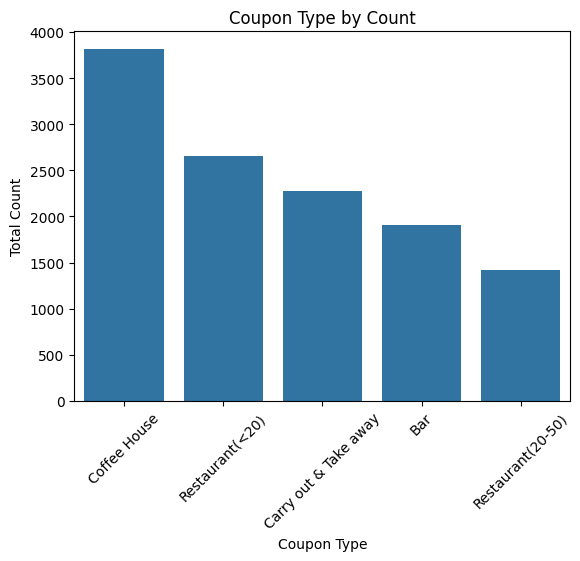

In [26]:
g1 = sns.barplot(x=df.coupon.value_counts().index, y=df.coupon.value_counts())
g1.tick_params(axis='x', rotation=45)
g1.set(xlabel='Coupon Type', ylabel='Total Count')
g1.set_title('Coupon Type by Count')

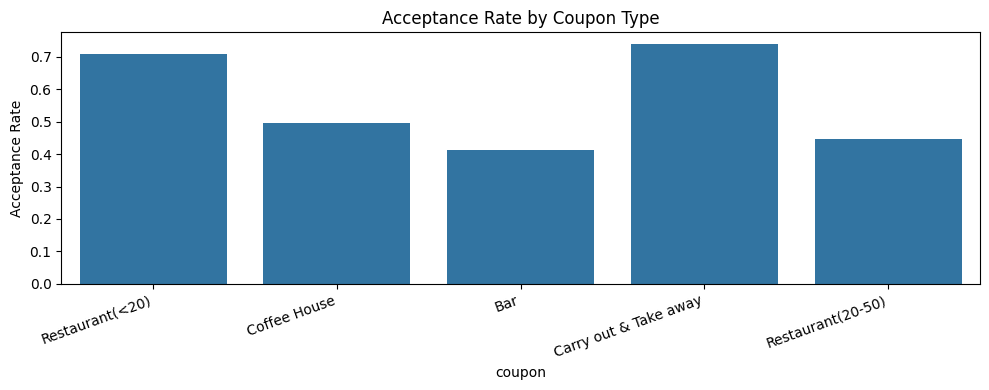

In [25]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x="coupon", y="Y", estimator=np.mean, errorbar=None)
plt.xticks(rotation=20, ha="right")
plt.title("Acceptance Rate by Coupon Type")
plt.ylabel("Acceptance Rate")
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

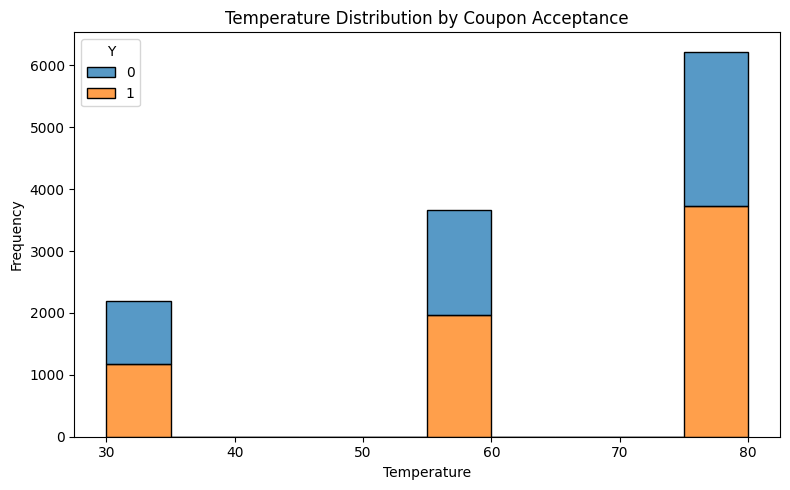

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="temperature", hue="Y", bins=10, multiple="stack")

plt.title("Temperature Distribution by Coupon Acceptance")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [30]:
df_bar_coupons = df.query("coupon == 'Bar'")
df_bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [34]:
bar_df = df[df["coupon"] == "Bar"]
bar_accept_rate = bar_df["Y"].mean()

print(f"Proportion of bar coupons accepted: {bar_accept_rate*100}")


Proportion of bar coupons accepted: 41.19184526921067


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [35]:
bar_df = df[df["coupon"] == "Bar"].copy()

# Group 1: 3 or fewer visits per month
low_bar = bar_df[bar_df["Bar"].isin(["never", "less1", "1~3"])]

# Group 2: more than 3 visits per month
high_bar = bar_df[bar_df["Bar"].isin(["4~8", "gt8"])]

low_rate = low_bar["Y"].mean()
high_rate = high_bar["Y"].mean()

print(f"Acceptance rate (≤ 3 visits/month): {low_rate:.2%}")
print(f"Acceptance rate (> 3 visits/month): {high_rate:.2%}")


Acceptance rate (≤ 3 visits/month): 37.27%
Acceptance rate (> 3 visits/month): 76.17%


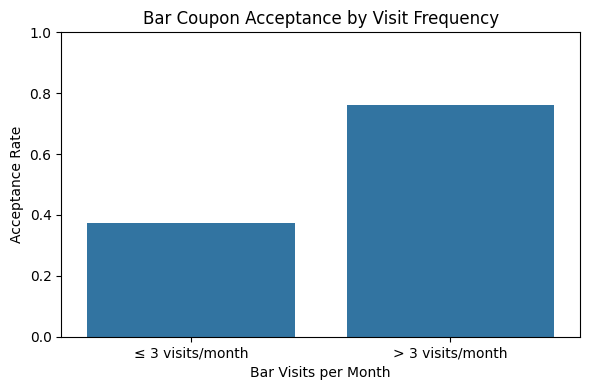

In [36]:
bar_df = df[df["coupon"] == "Bar"].copy()

bar_df["visit_group"] = bar_df["Bar"].apply(
    lambda x: "≤ 3 visits/month" if x in ["never", "less1", "1~3"]
    else "> 3 visits/month"
)

plt.figure(figsize=(6,4))
sns.barplot(data=bar_df, x="visit_group", y="Y", estimator=pd.Series.mean, errorbar=None)

plt.title("Bar Coupon Acceptance by Visit Frequency")
plt.xlabel("Bar Visits per Month")
plt.ylabel("Acceptance Rate")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [37]:
bar_df = df[df["coupon"] == "Bar"].copy()

# Age groups considered >25
over_25 = ["26", "31", "36", "41", "46", "50plus"]

target = bar_df[
    (bar_df["Bar"].isin(["1~3", "4~8", "gt8"])) &
    (bar_df["age"].isin(over_25))
]

others = bar_df.drop(target.index)

target_rate = target["Y"].mean()
others_rate = others["Y"].mean()

print(f"Acceptance rate (bar >1/month & age >25): {target_rate:.2%}")
print(f"Acceptance rate (all others): {others_rate:.2%}")


Acceptance rate (bar >1/month & age >25): 68.98%
Acceptance rate (all others): 33.77%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [38]:
bar_df = df[df["coupon"] == "Bar"].copy()

target = bar_df[
    (bar_df["Bar"].isin(["1~3", "4~8", "gt8"])) &
    (bar_df["passanger"] != "Kid(s)") &
    (bar_df["occupation"] != "Farming Fishing & Forestry")
]

others = bar_df.drop(target.index)

target_rate = target["Y"].mean()
others_rate = others["Y"].mean()

print(f"Acceptance rate (target segment): {target_rate:.2%}")
print(f"Acceptance rate (all others): {others_rate:.2%}")


Acceptance rate (target segment): 70.94%
Acceptance rate (all others): 29.79%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [39]:
bar_df = df[df["coupon"] == "Bar"].copy()

# condition 1
cond1 = (
    bar_df["Bar"].isin(["1~3", "4~8", "gt8"]) &
    (bar_df["passanger"] != "Kid(s)") &
    (bar_df["maritalStatus"] != "Widowed")
)

# condition 2
under_30 = ["below21", "21", "26"]
cond2 = (
    bar_df["Bar"].isin(["1~3", "4~8", "gt8"]) &
    bar_df["age"].isin(under_30)
)

# condition 3
low_income = ["$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]
cond3 = (
    bar_df["RestaurantLessThan20"].isin(["4~8", "gt8"]) &
    bar_df["income"].isin(low_income)
)

target_mask = cond1 | cond2 | cond3

target = bar_df[target_mask]
others = bar_df[~target_mask]

target_rate = target["Y"].mean()
others_rate = others["Y"].mean()

print(f"Acceptance rate (target segment): {target_rate:.2%}")
print(f"Acceptance rate (all others): {others_rate:.2%}")

Acceptance rate (target segment): 61.15%
Acceptance rate (all others): 29.80%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [45]:
# Create a text box with your hypothesis text
from IPython.display import display, HTML

hypothesis_text = """
<div style="border: 2px solid #4CAF50; padding: 20px; background-color: #f9f9f9; border-radius: 5px;">
<h3 style="color: #2E7D32;">Hypothesis: Drivers Who Accepted Bar Coupons</h3>

<p>Based on the segment comparisons, we can hypothesize that:</p>

<p><strong>Bar coupon acceptance is driven primarily by lifestyle alignment and social context rather than random preference.</strong></p>

<p>Drivers who accepted bar coupons tend to:</p>

<h4>1. Already be habitual bar visitors</h4>
<p>Acceptance is much higher among drivers who go to bars more than once a month. This suggests:</p>
<ul>
    <li>coupons reinforce existing behaviour – they do not create new habits</li>
    <li>acceptance reflects pre-existing lifestyle patterns</li>
    <li>The coupon is acting as a nudge, not a behaviour change tool.</li>
</ul>

<h4>2. Be in socially compatible situations</h4>
<p>Drivers traveling without kids show higher acceptance.</p>
<p>This implies:</p>
<ul>
    <li>acceptance depends on immediate feasibility</li>
    <li>social constraints reduce willingness</li>
    <li>bar visits are socially contextual decisions</li>
</ul>
<p>Drivers are evaluating the coupon in real time against their current environment.</p>

<h4>3. Be younger or socially flexible</h4>
<p>Drivers under 30 or not widowed show higher acceptance rates.</p>
<p>This suggests:</p>
<ul>
    <li>life stage affects spontaneity</li>
    <li>younger drivers are more responsive to impulse offers</li>
    <li>fewer household responsibilities correlate with higher acceptance</li>
</ul>
<p>Bar coupons align more with flexible lifestyles.</p>

<h4>4. Show price sensitivity linked to dining behaviour</h4>
<p>Drivers who frequently visit inexpensive restaurants and have lower incomes also show elevated acceptance.</p>
<p>This indicates:</p>
<ul>
    <li>coupons are more attractive to value-sensitive consumers</li>
    <li>bar coupons are perceived as economic opportunities</li>
    <li>dining habits predict coupon responsiveness</li>
</ul>
<p>This group likely optimizes discretionary spending.</p>

<h3 style="color: #2E7D32; margin-top: 20px;">Behavioural Summary Hypothesis</h3>
<p><strong>Drivers who accept bar coupons are socially flexible, habitual bar visitors, price-aware, and in situations where visiting a bar is immediately practical. Acceptance reflects lifestyle compatibility, not persuasion.</strong></p>
</div>
"""

display(HTML(hypothesis_text))

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [47]:
# I analyze which passengers accept coffee coupons and why.

In [48]:
coffee = df[df["coupon"] == "Coffee House"].copy()

print("Coffee coupon acceptance rate:", coffee["Y"].mean())

Coffee coupon acceptance rate: 0.49633123689727465


In [50]:
# Habit dominates: Coffee visit frequency drives acceptance

# People who already visit coffee shops frequently accept at much higher rates.

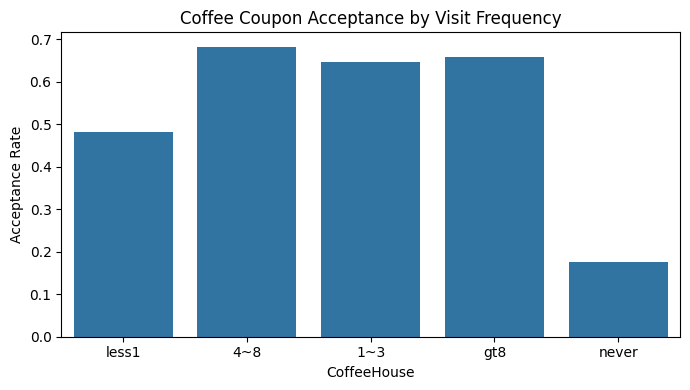

In [49]:
plt.figure(figsize=(7,4))
sns.barplot(data=coffee, x="CoffeeHouse", y="Y", estimator=pd.Series.mean, errorbar=None)

plt.title("Coffee Coupon Acceptance by Visit Frequency")
plt.ylabel("Acceptance Rate")
plt.tight_layout()
plt.show()


In [51]:
# Insights: Coupons reinforce existing habits. Frequent coffee visitors are far more likely to accept than non-visitors.

In [52]:
#Passenger context moderates acceptance

#Traveling with friends increases acceptance; traveling with kids reduces it.

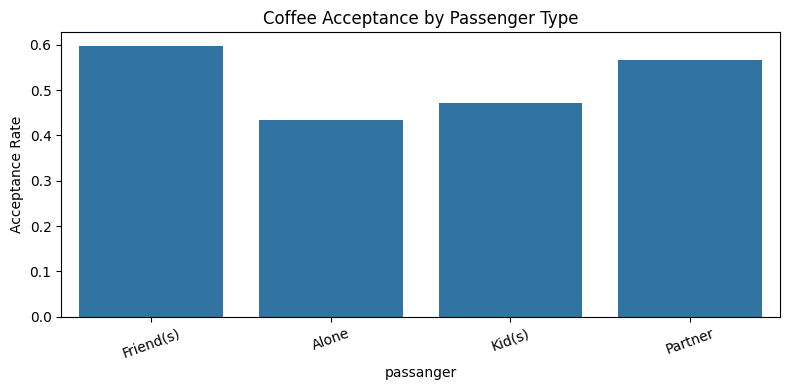

In [53]:
plt.figure(figsize=(8,4))
sns.barplot(data=coffee, x="passanger", y="Y", estimator=pd.Series.mean, errorbar=None)

plt.title("Coffee Acceptance by Passenger Type")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


In [54]:
# Insights: Social context affects feasibility. Coffee stops are more attractive in peer situations than family situations.

In [55]:
#Time of day interacts with coffee behavior

#Morning hours show higher acceptance than late hours.

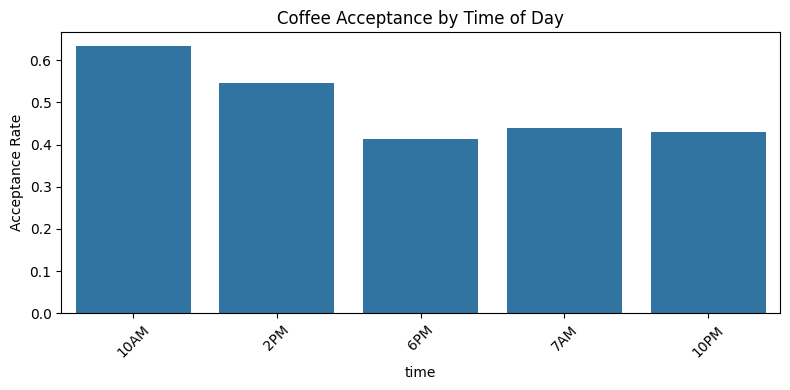

In [56]:
plt.figure(figsize=(8,4))
sns.barplot(data=coffee, x="time", y="Y", estimator=pd.Series.mean, errorbar=None)

plt.title("Coffee Acceptance by Time of Day")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [57]:
# Insights: Coffee acceptance aligns with biological routine. Morning aligns with caffeine demand.

In [58]:
# Age × Coffee habit interaction (heatmap)

# This shows behavioral clusters.

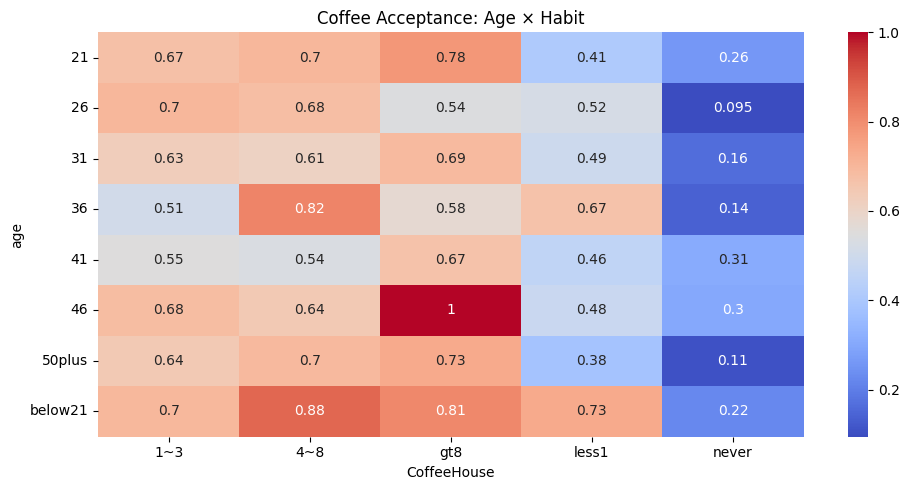

In [59]:
heat = pd.pivot_table(
    coffee,
    values="Y",
    index="age",
    columns="CoffeeHouse",
    aggfunc="mean"
)

plt.figure(figsize=(10,5))
sns.heatmap(heat, annot=True, cmap="coolwarm")

plt.title("Coffee Acceptance: Age × Habit")
plt.tight_layout()
plt.show()


In [60]:
# Insights: Younger frequent coffee visitors form the highest acceptance cluster. Older non-visitors show the lowest acceptance.

In [61]:
# Income moderates value sensitivity

# Lower income frequent coffee visitors accept at elevated rates.

/var/folders/lk/kln21k494rs7y6mxdxppfs7r0000gn/T/ipykernel_21427/368110087.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


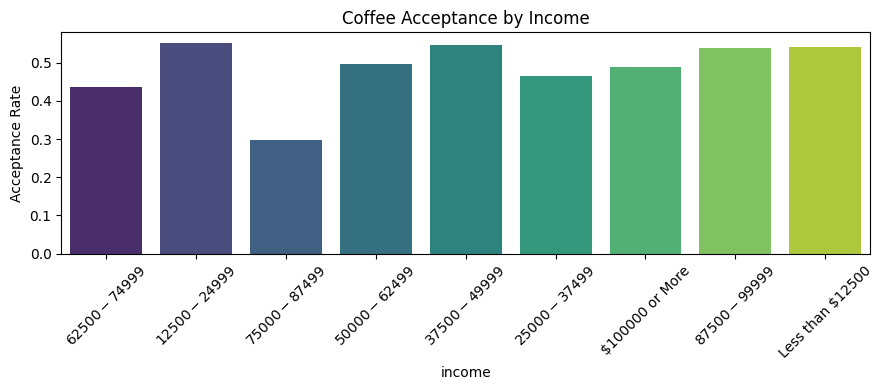

In [63]:
plt.figure(figsize=(9,4))

sns.barplot(
    data=coffee,
    x="income",
    y="Y",
    estimator=pd.Series.mean,
    errorbar=None,
    palette="viridis"   # try: "Set2", "coolwarm", "pastel", "magma"
)

plt.title("Coffee Acceptance by Income")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#